In [1]:
library(data.table)
library(ggplot2)
library(ggpubr)
library(dplyr)
# library(hrbrthemes)
library(viridis)
library(scales) # to access break formatting functions
`%!in%` <- Negate(`%in%`)
theme_set(theme_bw())


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal




In [8]:
e_coli <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/e_coli_97057.tsv")
read_names_lori <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/lori_reads.txt", header=F)
read_names_gatk <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/gatk_reads.txt", header=F)
# read_names_gatk <- read_names_gatk[V1 %like% "SRR12324251"]
# read_names

In [163]:
e_coli[V1 %!in% read_names$V1]
e_coli[V1 %!in% read_names_gatk$V1]

V1,V2,V3,V4,V5,V6,V7,V8,V9
<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
SRR12324251.3562792,137,Escherichia_coli_chromosome,96910,12,107M42S,=,96910,0
SRR12324251.7254111,89,Escherichia_coli_chromosome,96910,12,107M43S,=,96910,0
SRR12324251.9033118,99,Escherichia_coli_chromosome,96912,18,105M33S,=,97311,494
SRR12324251.3077331,137,Escherichia_coli_chromosome,96913,11,46S104M,=,96913,0
SRR12324251.8587047,161,Escherichia_coli_chromosome,96913,12,29S104M17S,=,1858696,1761908
SRR12324251.12573700,137,Escherichia_coli_chromosome,96913,12,46S104M,=,96913,0
SRR12324251.12574019,137,Escherichia_coli_chromosome,96913,12,46S104M,=,96913,0
SRR12324251.21946866,99,Escherichia_coli_chromosome,96913,11,29S104M17S,=,97138,355
SRR12324251.129276,153,Escherichia_coli_chromosome,96913,12,33S104M13S,=,96913,0


V1,V2,V3,V4,V5,V6,V7,V8,V9
<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>
SRR12324251.3562792,137,Escherichia_coli_chromosome,96910,12,107M42S,=,96910,0
SRR12324251.7254111,89,Escherichia_coli_chromosome,96910,12,107M43S,=,96910,0
SRR12324251.9033118,99,Escherichia_coli_chromosome,96912,18,105M33S,=,97311,494
SRR12324251.3077331,137,Escherichia_coli_chromosome,96913,11,46S104M,=,96913,0
SRR12324251.8587047,161,Escherichia_coli_chromosome,96913,12,29S104M17S,=,1858696,1761908
SRR12324251.12573700,137,Escherichia_coli_chromosome,96913,12,46S104M,=,96913,0
SRR12324251.12574019,137,Escherichia_coli_chromosome,96913,12,46S104M,=,96913,0
SRR12324251.21946866,99,Escherichia_coli_chromosome,96913,11,29S104M17S,=,97138,355
SRR12324251.129276,153,Escherichia_coli_chromosome,96913,12,33S104M13S,=,96913,0


In [11]:
nrow(e_coli)
nrow(read_names_lori)
nrow(read_names_gatk)
# e_coli[V1 == "SRR12324251.19754934"]
# e_coli[V1 %in% read_names$V1, var_in_lorikeet:=read_names$V2]
# joined <- left_join(read_names, e_coli, by="V1")
# joined <- left_join(joined, read_names_gatk, by="V1")
# e_coli[, missed:= ifelse(V1 %in% read_names[V1 %!in% read_names_gatk$V1]$V1, TRUE, FALSE)]
# e_coli
# joined
# joined[V2.x != V2]
read_names_lori[V5 %!in% read_names_gatk$V2]
# read_names_gatk

[1] 712

[1] 996

[1] 996

V1,V2,V3,V4,V5
<chr>,<chr>,<chr>,<chr>,<chr>


In [213]:
lori_probs <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/lorikeet_probs.txt", header=F)
# lori_probs
lori_probs[, c("pos","b"):=tstrsplit(V4, "-")]
# lori_probs[, pos := as.numeric(V5)]
lori_probs[, V7 := as.numeric(V7)]
lori_probs[pos >= 96999 & pos <= 97999, c(pos, V7)]
gatk_probs <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/gatk_probs.txt", header=F)

[1] "96999"             "97000"             "97001"            
   [4] "97002"             "97003"             "97004"            
   [7] "97005"             "97006"             "97007"            
  [10] "97008"             "97009"             "97010"            
  [13] "97011"             "97012"             "97013"            
  [16] "97014"             "97015"             "97016"            
  [19] "97017"             "97018"             "97019"            
  [22] "97020"             "97021"             "97022"            
  [25] "97023"             "97024"             "97025"            
  [28] "97026"             "97027"             "97028"            
  [31] "97029"             "97030"             "97031"            
  [34] "97032"             "97033"             "97034"            
  [37] "97035"             "97036"             "97037"            
  [40] "97038"             "97039"             "97040"            
  [43] "97041"             "97042"             "97043"            
  [46] "97044"             "97045"             "97046"            
  [49] "97047"             "97048"             "97049"            
  [52] "97050"             "97051"             "97052"            
  [55] "97053"             "97054"             "97055"            
  [58] "97056"             "97057"             "97058"            
  [61] "97059"             "97060"             "97061"            
  [64] "97062"             "97063"             "97064"            
  [67] "97065"             "97066"             "97067"            
  [70] "97068"             "97069"             "97070"            
  [73] "97071"             "97072"             "97073"            
  [76] "97074"             "97075"             "97076"            
  [79] "97077"             "97078"             "97079"            
  [82] "97080"             "97081"             "97082"            
  [85] "97083"             "97084"             "97085"            
  [88] "97086"             "97087"             "97088"            
  [91] "97089"             "97090"             "97091"            
  [94] "97092"             "97093"             "97094"            
  [97] "97095"             "97096"             "97097"            
 [100] "97098"             "97099"             "97100"            
 [103] "97101"             "97102"             "97103"            
 [106] "97104"             "97105"             "97106"            
 [109] "97107"             "97108"             "97109"            
 [112] "97110"             "97111"             "97112"            
 [115] "97113"             "97114"             "97115"            
 [118] "97116"             "97117"             "97118"            
 [121] "97119"             "97120"             "97121"            
 [124] "97122"             "97123"             "97124"            
 [127] "97125"             "97126"             "97127"            
 [130] "97128"             "97129"             "97130"            
 [133] "97131"             "97132"             "97133"            
 [136] "97134"             "97135"             "97136"            
 [139] "97137"             "97138"             "97139"            
 [142] "97140"             "97141"             "97142"            
 [145] "97143"             "97144"             "97145"            
 [148] "97146"             "97147"             "97148"            
 [151] "97149"             "97150"             "97151"            
 [154] "97152"             "97153"             "97154"            
 [157] "97155"             "97156"             "97157"            
 [160] "97158"             "97159"             "97160"            
 [163] "97161"             "97162"             "97163"            
 [166] "97164"             "97165"             "97166"            
 [169] "97167"             "97168"             "97169"            
 [172] "97170"             "97171"             "97172"            
 [175] "97173"             "97174"             "97175"            
 [178] "97176"             "97177"             "97

In [214]:
lori_probs[pos <= 96999, c("pos", "V7"), with=FALSE]

pos,V7
<chr>,<dbl>
96999,0


In [215]:
full_probs <- data.table(cbind(lori_probs[pos >= 96999 & pos <= 97999, c("pos", "V7"), with=FALSE], gatk_probs))
# full_probs
full_probs[, V7 := round(V7)]
full_probs[, V3 := round(V3)]
full_probs[V3 != V7,]

pos,V7,V1,V2,V3
<chr>,<dbl>,<chr>,<chr>,<dbl>


# Speed benchmarks
The low depth benchmarks were performed using a set of synthetic metagenomes from Quince et al. (STRONG). The metagenomes were assembled and MAGs were binned out, one MAG was chosen as a yard stick with which to measure variant calling/profiling speed. 

The high depth benchmarks were performed using the ZymBIOMICs samples generated by Olm et al. (InStrain). The Pseudomonas auroginosa reference genome was chosen as the benchmark genomes as it had considerably higher coverage compared to the other reference genomes.

Coverage for both the low depth and high depth examples was calculated using CoverM by mapping reads to all the refernce genomes at once to minimize chances of mismappings. Unmapped reads were discarded. Since only one BAM file could be provided to inStrain at a time, the BAMs were run in series and the total processing time was summed from all three runs. The RAM usage for inStrain was then measure as the peak RAM usage from the set of three runs. We thought this was the easiest way to consistently provided inStrain with 16 cores and measure RAM usage rather than making use of other tools like GNU `parallel`.

The coverages for each genomes are as follows:

| Genome |	Sample1 Coverage	| Sample1 Coverage	| Sample1 Coverage	 | Benchmark |
| ------ | -------------------- | ----------------- | ------------------ | --------- |
| Pseudomonas_aeruginosa_complete_genome.fasta	| 345.29077	| 346.82413	| 546.3083	| High Depth |
| metabat_bins_sens.tsv.007_sub.fa	| 13.991506	| 53.069847	| 22.082962	| Low Depth |


In [92]:
# E. coli
# ecoli_depth_benchmarks <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S03D/benchmarks/complete_results.tsv")
# ecoli_depth_benchmarks <- ecoli_depth_benchmarks[Tool != "instrain_1" & Tool != "instrain_2" & Tool != "instrain_3", ]
# ecoli_depth_benchmarks_m <- melt(ecoli_depth_benchmarks)

# PSeudomonas times
pseudo_depth_benchmarks <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/benchmarks/complete_results.tsv")
pseudo_depth_benchmarks <- pseudo_depth_benchmarks[Tool != "instrain_1" & Tool != "instrain_2" & Tool != "instrain_3", ]
# pseudo_depth_benchmarks[, `Wall Time`:=log10(`Wall Time`)]
# pseudo_depth_benchmarks[, `CPU Time`:=log10(`CPU Time`)]
pseudo_depth_benchmarks_m <- melt(pseudo_depth_benchmarks)

Warning message in melt.data.table(pseudo_depth_benchmarks):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [Tool, Genome, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message in melt.data.table(pseudo_depth_benchmarks):
“'measure.vars' [Wall Time, CPU Time, RAM Usage (Kb), RAM Usage (Gb), ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion.”


In [93]:
pseudo_depth_benchmarks_m[variable!="RAM Usage (Kb)", mean := mean(value), by=c("Tool", "Genome", "variable")]
pseudo_depth_benchmarks_m[variable!="RAM Usage (Kb)", sd := sd(value), by=c("Tool", "Genome", "variable")]
pseudo_depth_benchmarks_m[variable!="RAM Usage (Kb)", c("Tool", "Genome", "variable", "mean", "sd")] %>% unique

Tool,Genome,variable,mean,sd
<chr>,<chr>,<fct>,<dbl>,<dbl>
gatk_avx,P. aeruginosa,Wall Time,1.036800e+03,4.553790e+01
lorikeet_avx,P. aeruginosa,Wall Time,2.460360e+02,2.772874e+00
instrain_total,P. aeruginosa,Wall Time,6.133600e+04,3.152382e+03
gatk_avx,E. coli,Wall Time,7.136400e+03,3.625132e+02
lorikeet_avx,E. coli,Wall Time,2.253800e+03,6.058052e+00
instrain_total,E. coli,Wall Time,4.082820e+04,5.788909e+02
gatk_avx,P. aeruginosa,CPU Time,1.473864e+03,5.831595e+01
lorikeet_avx,P. aeruginosa,CPU Time,3.810408e+03,8.160301e+00
instrain_total,P. aeruginosa,CPU Time,1.112254e+05,4.218271e+03


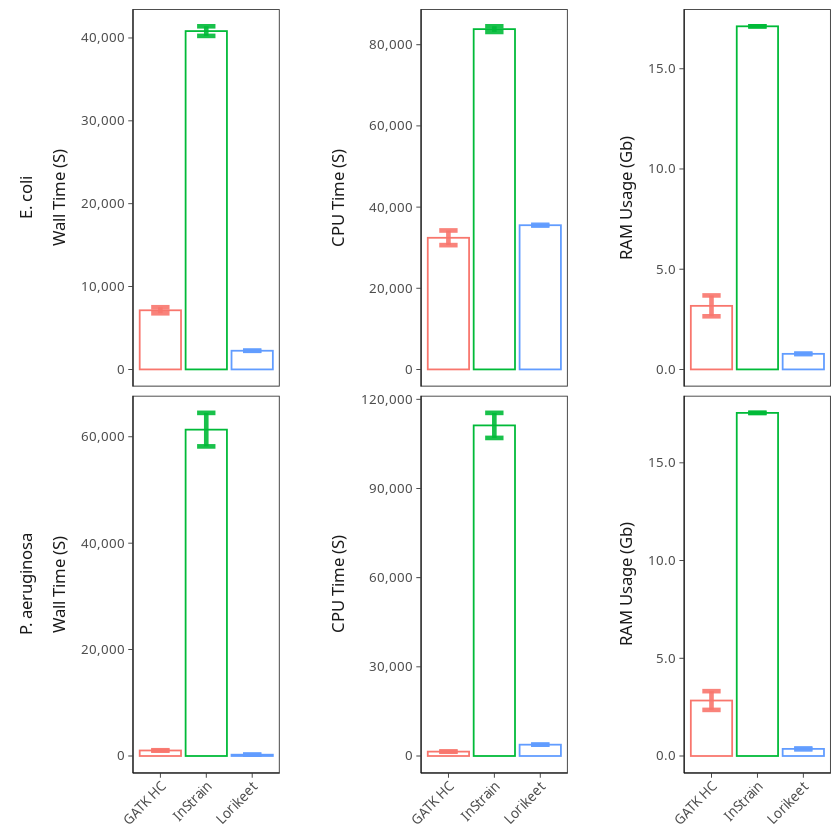

In [94]:
facet_labeller_genome <- function(variable, value) {
    c("E. coli", "", "", "P. aeruginosa", "", "")
}



pseudo <- ggplot(data=pseudo_depth_benchmarks_m[variable!="RAM Usage (Kb)", c("Tool", "Genome", "variable", "mean", "sd")] %>% unique) + 
#     geom_boxplot(aes(x=Tool, y=value), outlier.shape=NA) +
    geom_bar(stat="identity", aes(x=Tool, y=mean, color=Tool), fill=NA) +
#     geom_jitter(aes(fill=Tool, x=Tool, y=value), alpha=0.5, pch=21, color="black") +
    geom_errorbar( aes(x=Tool, ymin=mean-sd, ymax=mean+sd, color=Tool), width=0.4, alpha=0.9, size=1.3) +
    scale_fill_discrete(labels=c("GATK HC", "InStrain", "Lorikeet"), name="Tool") +
    scale_x_discrete(labels=c("GATK HC", "InStrain", "Lorikeet")) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.x=element_blank(),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=10),
      axis.text.x=element_text(angle=45, hjust=1, vjust=1),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      legend.position="none" ,
      legend.direction="horizontal", 
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank(),
      strip.background = element_blank(),
      strip.placement = "outside") +
    facet_wrap(~Genome + variable, scales="free_y", ncol=3,
                strip.position = "left", 
               labeller=labeller(
                   variable = as_labeller(c(`Wall Time` = "Wall Time (S)", `CPU Time` = "CPU Time (S)", `RAM Usage (Gb)` = "RAM Usage (Gb)")),
                   Genome = as_labeller(facet_labeller_genome)
               )
              )  +
    scale_y_continuous(label=comma) +
#     annotation_logticks(base = 10, sides="l", outside=F) + coord_cartesian(clip = "off") +
    ylab(NULL) +
    xlab(NULL)
pseudo

# ZymoBIOMICs ANI Measurement Comparisons

Using the ZymoBIOMICs samples generated by Olm et al. we compare the various ANI values generated by different tools. Ideally, the ANI values between samples should be 1.00 as each tool should be finding the same variants in each sample. A tool that does not have an ANI value of 1.00 likely failed to account for certain levels of technical variance inherit in sequencing data.

Reads were mapped against all Zymo provided references (including eukaryotic genomes) and then the result BAMs were provided to inStrain and Lorikeet. The ANI values for the other tools were sourced directly from Olm et al.

In [96]:
ani_results <- fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/ani_result.tsv")
ani_results[, Tool:=factor(Tool, levels=c("dRep", "MIDAS", "StrainPhlan", "inStrain", "GATK", "Lorikeet"))]

In [97]:
ani_plots <- ggplot(data=ani_results[Mapping == "CoverM Make"], aes(y=ANI, x=`ANI Method`)) +
    geom_boxplot(outlier.shape=NA) +
#     scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(aes(fill=Species), size=2, pch=21, alpha=0.5, color="black") +
    theme(axis.text=element_text(size=8),
          axis.title=element_text(size=10, face="bold"),
          axis.title.y=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
          axis.title.x=element_blank(),
          axis.line = element_line(size=0.25),
          axis.ticks=element_line(size=0.25),
          strip.text.y=element_text(size=6),
          axis.text.x=element_text(angle=45, hjust=1, vjust=1),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          legend.position="bottom",
          legend.direction="horizontal", 
          legend.text=element_text(size=10), 
          legend.background=element_blank(), 
          legend.key=element_blank()) +
    facet_wrap(~Tool)



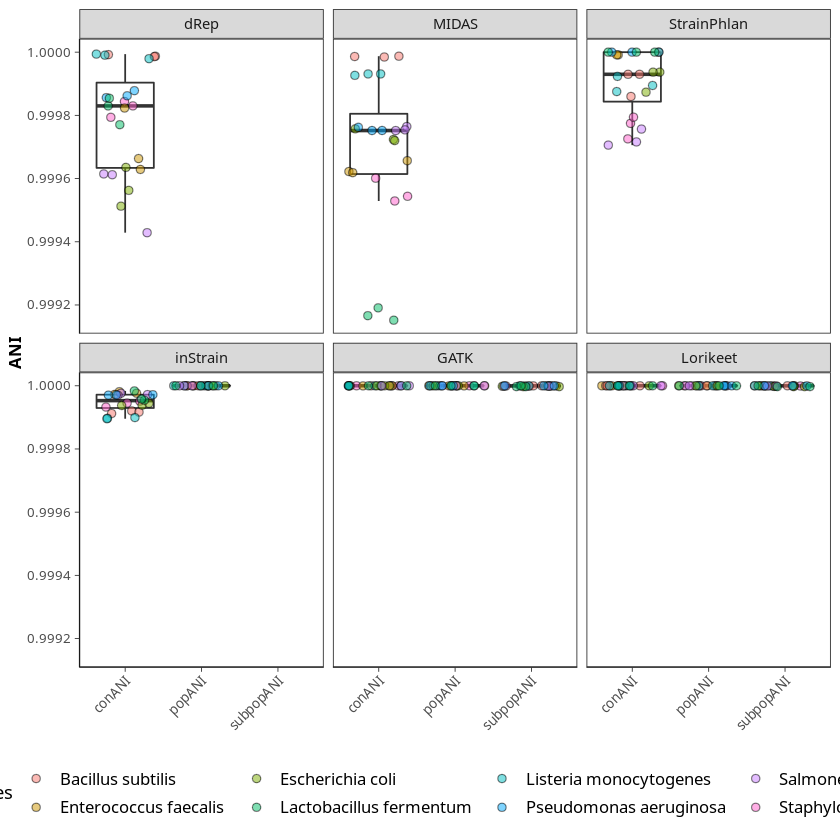

In [98]:
ani_plots

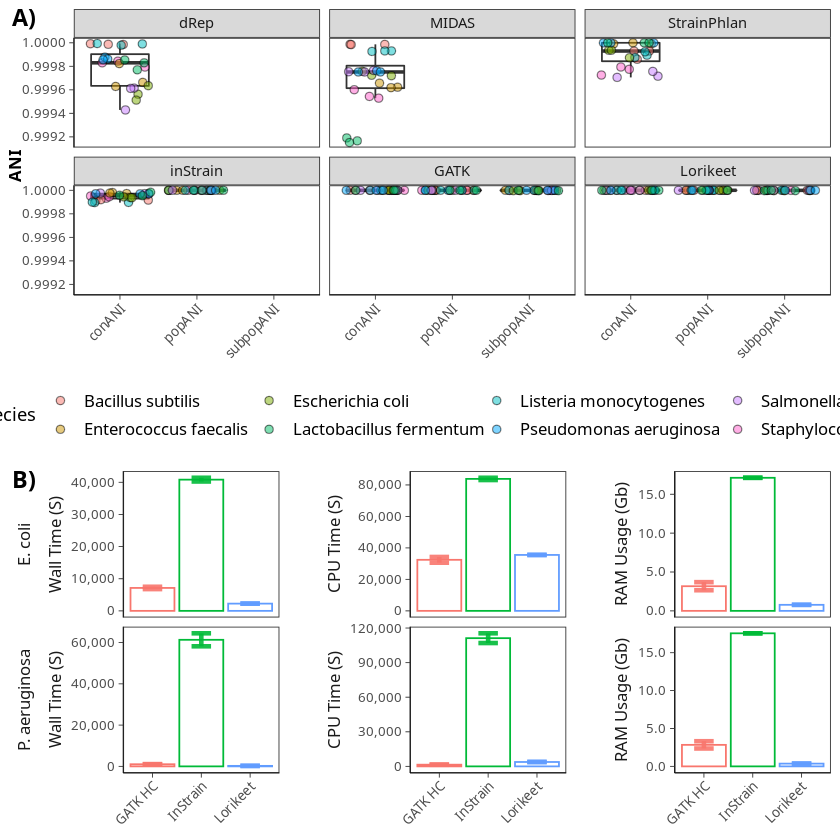

In [99]:
ggarrange(ani_plots, pseudo, labels=c("A)", "B)"), nrow=2, heights=c(0.55, 0.45))
ggsave("zymo_ani_and_performance.png", dpi=600, width=9, height=10)

# Variant benchmarks

Do HaplotypeCaller and Lorikeet call all the same variants? Here we just haphazardly compare the variants called by GATK and Lorikeet.
GATK calls more variants than Lorikeet, but the variants that Lorikeet calls have very high concordance with those found by GATK. Lorikeet performs some additional filtering steps to remove potential noisy variants that GATK does not, hence the discrepancy.

In [22]:
gatk_s03 <- fread("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S03D/98-gatk_benchmarks/metabat_bins_sens.tsv.007_sub_gatk_threaded.vcf", skip="#CHROM")
lori_s03 <- fread("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S03D/test/metabat_bins_sens.tsv.007_sub/metabat_bins_sens.tsv.007_sub.vcf", skip="#CHROM")
lori_s03[, c(NA, "#CHROM"):=tstrsplit(`#CHROM`, "~", fixed=TRUE)]

chroms <- gatk_s03$`#CHROM`[!duplicated(gatk_s03$`#CHROM`)]
# lori_s03 <- lori_s03[order(chroms), ]
lori_s03$`#CHROM` <- ordered(lori_s03$`#CHROM`, chroms)
lori_s03 <- lori_s03[with(lori_s03, order(`#CHROM`, POS)),]

gatk_s05 <- fread("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S05D/98-gatk_benchmarks/metabat_bins_2_040_gatk.vcf", skip="#CHROM")
lori_s05 <- fread("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S05D/06-lorikeet_0.6.0/metabat_bins_2.tsv.040/metabat_bins_2.tsv.040.vcf", skip="#CHROM")
lori_s05[, c(NA, "#CHROM"):=tstrsplit(`#CHROM`, "~", fixed=TRUE)]

chroms <- gatk_s05$`#CHROM`[!duplicated(gatk_s05$`#CHROM`)]
# lori_s03 <- lori_s03[order(chroms), ]
lori_s05$`#CHROM` <- ordered(lori_s05$`#CHROM`, chroms)
lori_s05 <- lori_s05[with(lori_s05, order(`#CHROM`, POS)),]

ERROR: Error in fread("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S05D/06-lorikeet_0.6.0/metabat_bins_2.tsv.040/metabat_bins_2.tsv.040.vcf", : File '/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/00-STRONG_sim/Synth_G45_S05D/06-lorikeet_0.6.0/metabat_bins_2.tsv.040/metabat_bins_2.tsv.040.vcf' does not exist or is non-readable. getwd()=='/home/n10853499/00-jupyter/02-lorikeet_testing'


In [23]:
sum(gatk_s03[, .N, by=`#CHROM`]$N)
sum(lori_s03[, .N, by=`#CHROM`]$N)

nrow(lori_s03[gatk_s03, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of lorikeet variants matching gatk variant
nrow(gatk_s03[lori_s03, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of gatk variant match lorikeet variant

[1] 6954

[1] 5588

[1] 5395

[1] 5395

In [24]:
sum(gatk_s03[, .N, by=`#CHROM`]$N)
sum(lori_s03[, .N, by=`#CHROM`]$N)

nrow(lori_s03[gatk_s03, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of lorikeet variants matching gatk variant
nrow(gatk_s03[lori_s03, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of gatk variant match lorikeet variant

[1] 6954

[1] 5588

[1] 5395

[1] 5395

In [25]:
sum(gatk_s05[, .N, by=`#CHROM`]$N)
sum(lori_s05[, .N, by=`#CHROM`]$N)

nrow(lori_s05[gatk_s05, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of lorikeet variants matching gatk variant
nrow(gatk_s05[lori_s05, on = .(`#CHROM` = `#CHROM`, `POS` = `POS`, `REF` = `REF`, `ALT` = `ALT`)][ID != 'NA']) # number of gatk variant match lorikeet variant

[1] 939

ERROR: Error in eval(expr, envir, enclos): object 'lori_s05' not found


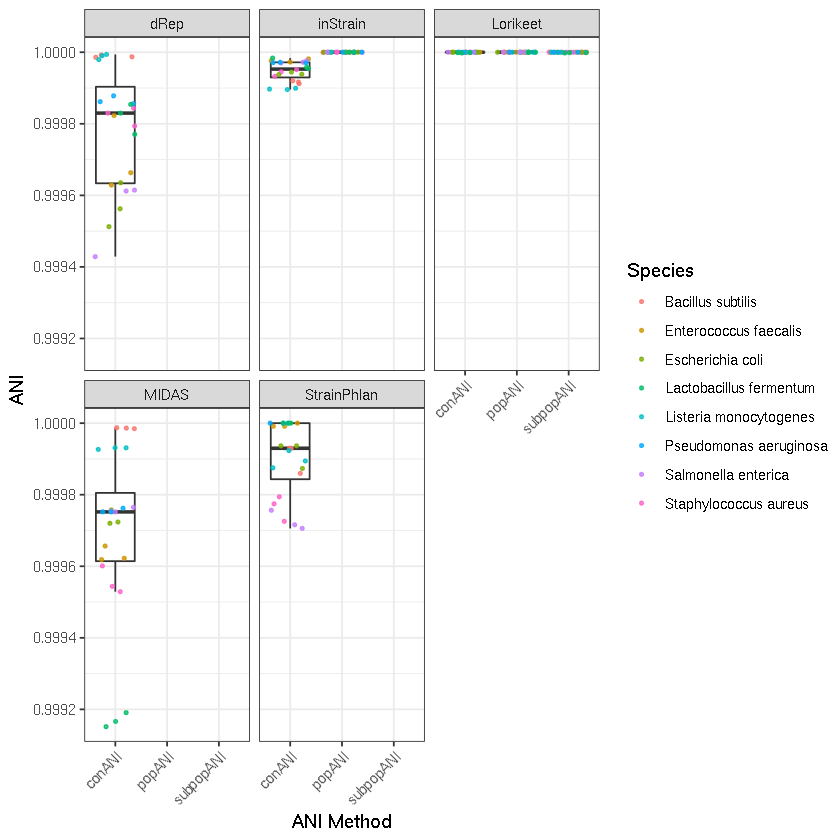

In [46]:
read_file <- function(path) {
    filename <- tstrsplit(path, '/', keep=10L)
    filename <- gsub(".tsv", "", filename)
    filename <- gsub("_complete_genome_prc", "", filename)
    filename <- gsub("_prc", "", filename)
    filename <- gsub("u_vs_f", "Unused", filename)
    filename <- gsub("f_vs_f", "Filtered", filename)
    filename <- gsub("u_vs_u", "Unfiltered", filename)
    filename <- gsub("_", " ", filename)
    filtered <- tstrsplit(filename, " ", keep=3L)
    filename <- gsub(" Filtered", "", filename)
    filename <- gsub(" Unfiltered", "", filename)
    filename <- gsub(" Unused", "", filename)
    prc <- fread(path)
    prc[, c("genome", "filter"):=c(filename, filtered)]
    return(prc)
}
# Sys.glob("/lustre/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/07-sompy_results/*.tsv")
prc_files <- Sys.glob("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/04-instrain_zymo/07-sompy_results/*.tsv")
prc <- lapply(prc_files, read_file)
prc <- do.call(rbind, prc)
# prc[, type:=ifelse(type=="indels", "INDELs", type)]
prc[, genome:=ifelse(genome=="combined references", "Combined", genome)]

Warning message in fread(path):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread(path):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread(path):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to

Warning message in fread(path):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread(path):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [47]:
prc[genome=="Combined"]

V1,type,total.truth,total.query,tp,fp,fn,unk,ambi,recall,⋯,recall2,precision,precision_lower,precision_upper,na,ambiguous,fp.region.size,fp.rate,genome,filter
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>
0,indels,221,224,212,12,9,0,0,0.959276,⋯,0.959276,0.946429,0.911056,0.970385,0,0,30935041,0.387910,Combined,Filtered
1,SNVs,1369,1428,1354,74,15,0,0,0.989043,⋯,0.989043,0.948179,0.935764,0.958781,0,0,30935041,2.392109,Combined,Filtered
5,records,1590,1652,1566,86,24,0,0,0.984906,⋯,0.984906,0.947942,0.936437,0.957880,0,0,30935041,2.780019,Combined,Filtered
0,indels,491,224,218,6,273,0,0,0.443992,⋯,0.443992,0.973214,0.945629,0.988744,0,0,30984613,0.193645,Combined,Unused
1,SNVs,4742,1428,1411,17,3331,0,0,0.297554,⋯,0.297554,0.988095,0.981437,0.992782,0,0,30984613,0.548659,Combined,Unused
5,records,5233,1652,1629,23,3604,0,0,0.311294,⋯,0.311294,0.986077,0.979544,0.990913,0,0,30984613,0.742304,Combined,Unused
7,others,3,0,0,0,3,0,0,0.000000,⋯,0.000000,0.000000,0.000000,1.000000,NaN,NaN,30984613,0.000000,Combined,Unused
0,indels,491,671,462,209,29,0,0,0.940937,⋯,0.940937,0.688525,0.652731,0.722695,0,0,30984613,6.745284,Combined,Unfiltered
1,SNVs,4742,6080,4654,1426,88,0,0,0.981442,⋯,0.981442,0.765461,0.754685,0.775983,0,0,30984613,46.022844,Combined,Unfiltered


In [45]:
prc[, genome:=factor(genome, levels=c("Combined", "Bacillus subtilis", "Enterococcus faecalis","Escherichia coli","Lactobacillus fermentum","Listeria monocytogenes","Pseudomonas aeruginosa","Salmonella enterica","Staphylococcus aureus"))]

prc_plotting <- prc[filter=="filtered" & type!="others" & type!="records"]

zymo <- ggplot(data=prc[filter!="Unused" & type!="others" & type!="records"]) +
    geom_point(aes(x=recall, y=precision, fill=genome, size=total.truth), alpha=0.5, pch=21, color="black") +
    facet_wrap(~filter + type, nrow=1) + 
    labs(x="Recall", y="Precision", size="GATK variants", fill="Genome") +
    expand_limits(y=c(0, 1)) + 
    expand_limits(x=c(0, 1)) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.y=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
#       axis.title.x=element_blank(),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=6),
      axis.text.x=element_text(angle=45, hjust=1, vjust=1),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
#       legend.position="bottom",
#       legend.direction="horizontal", 
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank()) +
    guides(size = guide_legend(order = 2), colour = guide_legend(order = 1))
zymo
# ggsave("lorikeet_vs_gatk_prc.png", height=6, width=8, dpi=600)

ERROR: Error in eval(expr, envir, enclos): object 'prc' not found


In [44]:
prc[genome %like% "Combined" & type!="others" & type!="records"]

ERROR: Error in eval(expr, envir, enclos): object 'prc' not found


In [168]:
lorikeet_hg38_unfiltered <- fread('/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/lorikeet_small_cut.som.py.tsv')
# lorikeet_hg38_filtered <- fread('/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/lorikeet_eval_filtered.som.py.tsv')
gatk_hg38_unfiltered <- fread('/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/gatk_unfiltered.som.py.tsv')
# gatk_hg38_filtered <- fread('/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/gatk_filtered.som.py.tsv')
lorikeet_hg38_unfiltered[, tool:="Lorikeet"]
lorikeet_hg38_unfiltered[, genome:="hg38"]
gatk_hg38_unfiltered[, tool:="GATK HaplotypeCaller"]
gatk_hg38_unfiltered[, genome:="hg38"]
hg38_prc <- rbind(lorikeet_hg38_unfiltered, gatk_hg38_unfiltered)
hg38_prc

Warning message in fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/lorikeet_small_cut.som.py.tsv"):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”
Warning message in fread("/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/gatk_unfiltered.som.py.tsv"):
“Detected 19 column names but the data has 20 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


V1,type,total.truth,total.query,tp,fp,fn,unk,ambi,recall,⋯,recall2,precision,precision_lower,precision_upper,na,ambiguous,fp.region.size,fp.rate,tool,genome
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int64>,<dbl>,<chr>,<chr>
0,indels,572709,804633,551836,252797,20873,0,0,0.963554,⋯,0.963554,0.685823,0.684808,0.686837,0,0,2584803627,97.801240,Lorikeet,hg38
1,SNVs,3596231,3837575,3523428,314147,72803,0,0,0.979756,⋯,0.979756,0.918139,0.917865,0.918413,0,0,2584803627,121.536119,Lorikeet,hg38
5,records,4167900,4638047,4074315,563732,93585,0,0,0.977546,⋯,0.977546,0.878455,0.878157,0.878752,0,0,2584803627,218.094711,Lorikeet,hg38
7,others,19,0,0,0,19,0,0,0.000000,⋯,0.000000,0.000000,0.000000,1.000000,NaN,NaN,2584803627,0.000000,Lorikeet,hg38
0,indels,572709,812163,552235,259928,20474,0,0,0.964251,⋯,0.964251,0.679956,0.678941,0.680970,0,0,3031042417,85.755316,GATK HaplotypeCaller,hg38
1,SNVs,3596231,3837281,3525681,311600,70550,0,0,0.980382,⋯,0.980382,0.918797,0.918523,0.919070,0,0,3031042417,102.802916,GATK HaplotypeCaller,hg38
5,records,4167900,4645275,4076965,568310,90935,0,0,0.978182,⋯,0.978182,0.877658,0.877360,0.877956,0,0,3031042417,187.496551,GATK HaplotypeCaller,hg38
7,others,19,4585,0,4585,19,0,0,0.000000,⋯,0.000000,0.000000,0.000000,0.000804,0,0,3031042417,1.512681,GATK HaplotypeCaller,hg38


In [132]:
?facet_wrap

In [147]:
human_compute <- fread('/mnt/hpccs01/scratch/microbiome/n10853499/02-lorikeet_testing/06-giab/00-utah/compute_times.tsv')
human_compute[, c("Tool", "Wall Time (S)", "CPU Time (S)", "RAM Usage (Gb)"), with=TRUE]
human_compute_m <- melt(human_compute[, c("Tool", "Wall Time (S)", "CPU Time (S)", "RAM Usage (Gb)"), with=TRUE])
human_compute_m
human_times <- ggplot(data=human_compute_m) + 
    geom_bar(
        stat='identity', color="black",
        aes(x=Tool, y = value, fill=Tool)) + 
    facet_wrap(~variable, scales="free_y", nrow=3,
                strip.position = "left")  +
    scale_y_continuous(label=comma) +
    ylab(NULL) +
    xlab(NULL) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.y=element_text(margin = margin(t = 0, r=2, b = 0, l = 0)),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=6),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
      legend.title=element_text(margin = margin(r=30)),
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank(),
      strip.background = element_blank(),
      strip.placement = "outside")

Tool,Wall Time (S),CPU Time (S),RAM Usage (Gb)
<chr>,<dbl>,<dbl>,<dbl>
GATK HaplotypeCaller,51121,1373395.7,12.48208
Lorikeet,17597,847768.8,16.27951


Warning message in melt.data.table(human_compute[, c("Tool", "Wall Time (S)", "CPU Time (S)", :
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [Tool]. Consider providing at least one of 'id' or 'measure' vars in future.”


Tool,variable,value
<chr>,<fct>,<dbl>
GATK HaplotypeCaller,Wall Time (S),5.112100e+04
Lorikeet,Wall Time (S),1.759700e+04
GATK HaplotypeCaller,CPU Time (S),1.373396e+06
Lorikeet,CPU Time (S),8.477688e+05
GATK HaplotypeCaller,RAM Usage (Gb),1.248208e+01
Lorikeet,RAM Usage (Gb),1.627951e+01


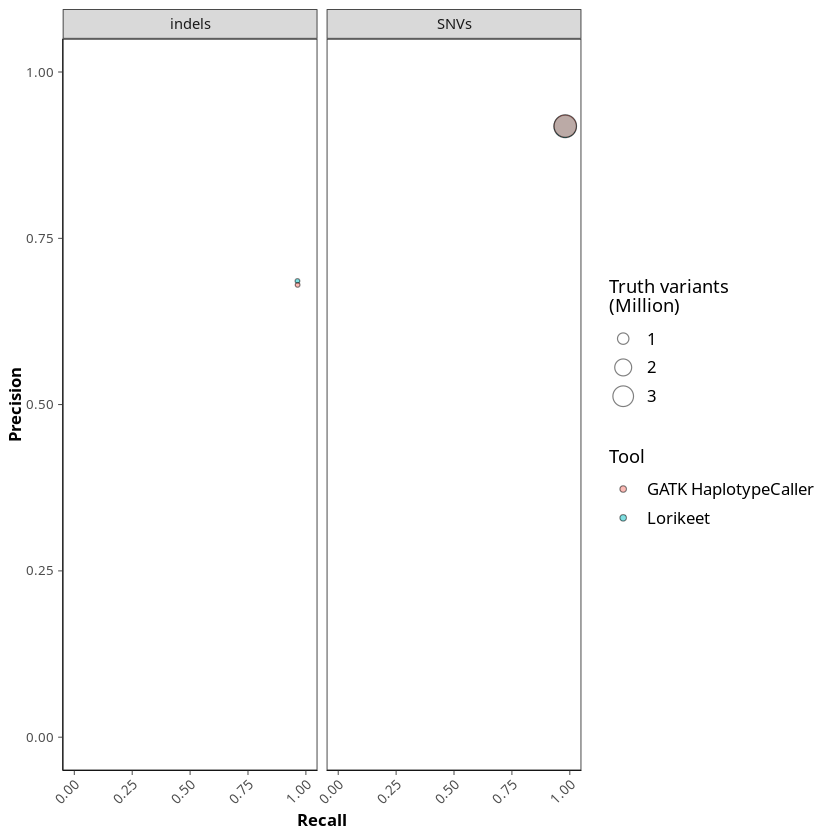

In [169]:

human <- ggplot(data=hg38_prc[type!="others" & type!="records"]) +
    geom_point(colour="black", pch=21, aes(x=recall, y=precision, fill=tool, size=total.truth / 1e6), alpha=0.5) +
    facet_wrap(~type) + 
    labs(x="Recall", y="Precision", size="Truth variants \n(Million)", fill="Tool") +
    expand_limits(y=c(0, 1)) + 
    expand_limits(x=c(0, 1)) +
    theme(axis.text=element_text(size=8),
      axis.title=element_text(size=10, face="bold"),
      axis.title.y=element_text(margin = margin(t = 0, r=0, b = 0, l = 0)),
#       axis.title.x=element_blank(),
      axis.line = element_line(size=0.25),
      axis.ticks=element_line(size=0.25),
      strip.text.y=element_text(size=6),
      axis.text.x=element_text(angle=45, hjust=1, vjust=1),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank(),
      panel.background = element_blank(),
#       legend.position="bottom",
#       legend.direction="horizontal", 
#       legend.title=element_text(margin = margin(r=0)),
      legend.text=element_text(size=10), 
      legend.background=element_blank(), 
      legend.key=element_blank()) +
    guides(size = guide_legend(order = 2), colour = guide_legend(order = 1))
human

In [164]:
human_combo <- ggarrange(human, human_times, ncol=2, labels=c("B)", "C)"), common.legend=T, legend="bottom")

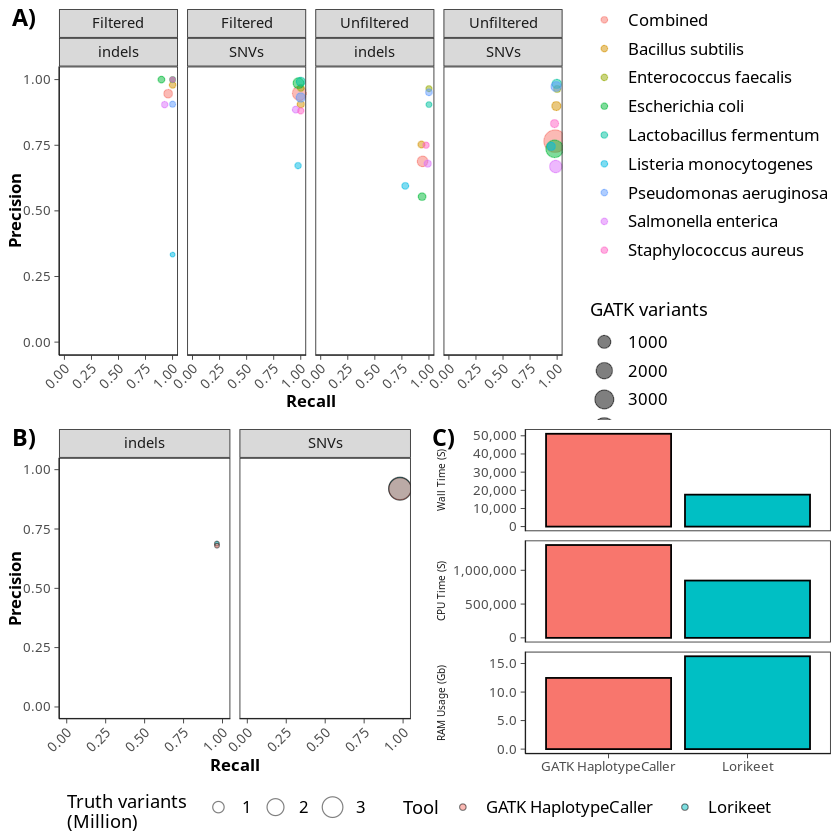

In [167]:
lorikeet_prc <- ggarrange(zymo, human_combo, nrow=2, ncol=1, labels=c("A)"), heights=c(0.5,0.5))
lorikeet_prc
ggsave("lorikeet_prc_plots.png", height=10, width=8, dpi=600, type = "cairo-png")

# Server Debugging


No id variables; using all as measure variables


variable,value
N008,428
N008,360
N008,370
N009,221
N009,214
N009,219


No id variables; using all as measure variables
No id variables; using all as measure variables


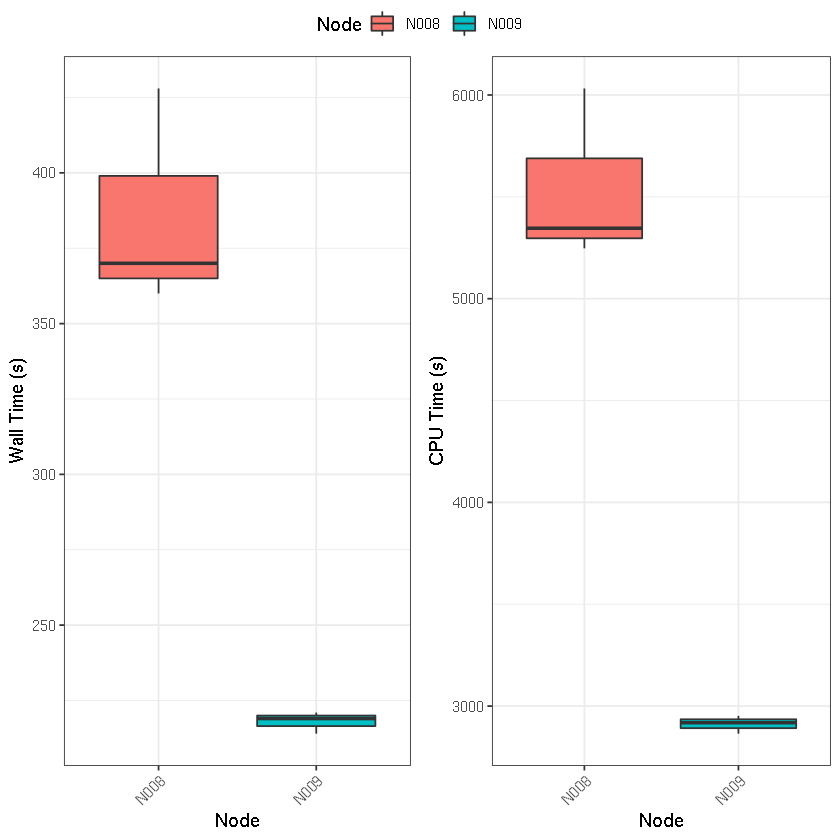

In [28]:
lorikeet_wall <- c(3 * 60 + 41, 3 * 60 + 34, 3 * 60 + 39) #, 3 * 60 + 30.9, 3 * 60 + 39.8)
lorikeet_cpu <- c(48 * 60 + 38.5, 47 * 60 + 44.7, 49 * 60 + 11.8) #, 46 * 60 + 51.9, 50 * 60 + 0.2)

node_008_wall <- c(7 * 60 + 8, 6 * 60, 6 * 60 + 10) #, 3 * 60 + 30.9, 3 * 60 + 39.8)
node_008_cpu <- c(6032.12, 5247.32, 5345.84) #, 46 * 60 + 51.9, 50 * 60 + 0.2)


wall_time = data.frame(
    N008 = node_008_wall,
    N009 = lorikeet_wall
)

cpu_time = data.frame(
    N008 = node_008_cpu,
    N009 = lorikeet_cpu
)

melt(wall_time)
wall_time_plot <- ggplot(data=melt(wall_time)) + geom_boxplot(aes(x=variable, y=value, fill=factor(variable))) +
    scale_fill_discrete(labels=c("N008", "N009"), name="Node") +
    scale_x_discrete(labels=c("N008", "N009")) +
    theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1)) + 
    xlab("Node") +
    ylab("Wall Time (s)")

cpu_time_plot <- ggplot(data=melt(cpu_time)) + geom_boxplot(aes(x=variable, y=value, fill=factor(variable))) +
    scale_fill_discrete(labels=c("N008", "N009"), name="Node") +
    scale_x_discrete(labels=c("N008", "N009")) +
    theme(axis.text.x = element_text(angle=45, vjust=1, hjust=1)) + 
    xlab("Node") +
    ylab("CPU Time (s)")

ggarrange(wall_time_plot, cpu_time_plot, common.legend=T)